In [1]:
# importing relevant libraries

import pandas as pd
import numpy as np
from lxml import html
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_colwidth = 100  # increase the maximum column width to 100 characters

##### 1ST STEP - <u>DATA GATHERING</u>

In [2]:
# extracting four datasets from the Coca-cola html files present on the shared website link
# each dataset contains at least two years of relevant data

url = 'https://investors.coca-colacompany.com/filings-reports/all-sec-filings/content/0000021344-12-000007/a2011123110-k.htm#sFD60D13C2AB8AE15B2B55FE75624D861'
url_1 = 'https://investors.coca-colacompany.com/filings-reports/all-sec-filings/content/0000021344-15-000005/a2014123110-k.htm#sADED6865E781876F124F634A1CDE019D'
url_2 = 'https://investors.coca-colacompany.com/filings-reports/all-sec-filings/content/0000021344-18-000008/a2017123110-k.htm'
url_3 = 'https://investors.coca-colacompany.com/filings-reports/all-sec-filings/content/0000021344-20-000006/a2019123110-k.htm'

In [3]:
# reading HTML data from the specified urls 
# storing it in respective DataFrame objects 

data_0 = pd.read_html(url)
data_1 = pd.read_html(url_1)
data_2 = pd.read_html(url_2)
data_3 = pd.read_html(url_3)

In [266]:
# creating copies of the original datasets
# this is to ensure that the original datasets are not altered

df_0 = data_0.copy()
df_1 = data_1.copy()
df_2 = data_2.copy()
df_3 = data_3.copy()

In [267]:
# testing the first dataframe for the retrieved data
 
df_0[0].head()

,0,1,2
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,ý,NaN,ANNUAL REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934


In [268]:
# testing the second dataframe for the retrieved data

df_1[0].head()

,0,1,2
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,ý,NaN,ANNUAL REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934


In [269]:
# testing the third dataframe for the retrieved data

df_2[0].head()

,0,1,2
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,ý,NaN,ANNUAL REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934


In [270]:
# testing the forth dataframe for the retrieved data

df_3[0].head()

,0,1,2
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,☒,NaN,ANNUAL REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934


#### 2ND + 3RD STEP - <u>DATA CLEANING & TRANSFORMATION</u>

##### 1. dropping the irrelevant data columns

In [271]:
# extracting the relevant data from the first dataframe

x = [0,2,6,10] # a list of relevant column indices
y = [0,2,5,8] 
df_0 = df_0[90][x] # trimming the table index 90
df_1 = df_1[88][x] # trimming the table index 88
df_2 = df_2[90][x] # trimming the table index 90 
df_3 = df_3[122][y] # trimming the table index 122

In [272]:
df_0.head(8)

,0,2,6,10
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,"Year Ended December 31,",2011.0,2010.0,2009.0
4,(In millions except percentages and per share data),NaN,NaN,NaN
5,NET OPERATING REVENUES,46542.0,35119.0,30990.0
6,Cost of goods sold,18216.0,12693.0,11088.0
7,GROSS PROFIT,28326.0,22426.0,19902.0


In [273]:
df_1.head(8)

,0,2,6,10
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,"Year Ended December 31,",2014,2013.0,2012.0
4,(In millions except percentages and per share data),NaN,NaN,NaN
5,NET OPERATING REVENUES,45998,46854.0,48017.0
6,Cost of goods sold,17889,18421.0,19053.0
7,GROSS PROFIT,28109,28433.0,28964.0


In [274]:
df_2.head(8)

,0,2,6,10
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,"Year Ended December 31,",2017,2016,2015
4,(In millions except percentages and per share data),NaN,NaN,NaN
5,NET OPERATING REVENUES,35410,41863,44294
6,Cost of goods sold,13256,16465,17482
7,GROSS PROFIT,22154,25398,26812


In [275]:
df_3.head(8)

,0,2,5,8
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,"Year Ended December 31,",2019.0,2018,2017
3,Net Operating Revenues,37266.0,34300,36212
4,Cost of goods sold,14619.0,13067,13721
5,Gross Profit,22647.0,21233,22491
6,"Selling, general and administrative expenses",12103.0,11002,12834
7,Other operating charges,458.0,1079,1902


##### 2. getting rid of all the missing values in the trimmed tables

In [276]:
# using a for loop to iterate over the dataframes 
# dropping the rows with all NaN values

for i in [df_0, df_1, df_2, df_3]:
    i.dropna(axis=0, how='all', inplace=True)


In [277]:
df_0.head(4)

,0,2,6,10
3,"Year Ended December 31,",2011.0,2010.0,2009.0
4,(In millions except percentages and per share data),NaN,NaN,NaN
5,NET OPERATING REVENUES,46542.0,35119.0,30990.0
6,Cost of goods sold,18216.0,12693.0,11088.0


In [278]:
df_1.head(4)

,0,2,6,10
3,"Year Ended December 31,",2014,2013.0,2012.0
4,(In millions except percentages and per share data),NaN,NaN,NaN
5,NET OPERATING REVENUES,45998,46854.0,48017.0
6,Cost of goods sold,17889,18421.0,19053.0


In [279]:
df_2.head(4)

,0,2,6,10
3,"Year Ended December 31,",2017,2016,2015
4,(In millions except percentages and per share data),NaN,NaN,NaN
5,NET OPERATING REVENUES,35410,41863,44294
6,Cost of goods sold,13256,16465,17482


In [280]:
df_2

,0,2,6,10
3,"Year Ended December 31,",2017,2016,2015
4,(In millions except percentages and per share data),NaN,NaN,NaN
5,NET OPERATING REVENUES,35410,41863,44294
6,Cost of goods sold,13256,16465,17482
7,GROSS PROFIT,22154,25398,26812
8,GROSS PROFIT MARGIN,62.6,60.7,60.5
9,"Selling, general and administrative expenses",12496,15262,16427
10,Other operating charges,2157,1510,1657
11,OPERATING INCOME,7501,8626,8728
12,OPERATING MARGIN,21.2,20.6,19.7


In [281]:
df_3.head(4)

,0,2,5,8
2,"Year Ended December 31,",2019.0,2018,2017
3,Net Operating Revenues,37266.0,34300,36212
4,Cost of goods sold,14619.0,13067,13721
5,Gross Profit,22647.0,21233,22491


In [282]:
# dropping row indices 3 and 4 from the first three dataframes

for m in [df_0, df_1, df_2]:
    m.drop(index=[3,4], inplace=True)
    
df_3.drop(index=2, columns=8, inplace=True)


##### 3. changing the data labels for the column headers 

In [283]:
# renaming the columns of the dataframes

df_0.columns = ['Year Ended December 31', '2011', '2010', '2009']
df_1.columns = ['Year Ended December 31', '2014', '2013', '2012']
df_2.columns = ['Year Ended December 31', '2017', '2016', '2015']
df_3.columns = ['Year Ended December 31', '2019', '2018']

In [284]:
# checking for the new column names in the first dataframe

df_0.head(1)

,Year Ended December 31,2011,2010,2009
5,NET OPERATING REVENUES,46542.0,35119.0,30990.0


In [285]:
# checking for the new column names in the second dataframe

df_1.head(1)

,Year Ended December 31,2014,2013,2012
5,NET OPERATING REVENUES,45998,46854.0,48017.0


In [286]:
# checking for the new column names in the third dataframe

df_2.head(1)

,Year Ended December 31,2017,2016,2015
5,NET OPERATING REVENUES,35410,41863,44294


In [287]:
# checking for the new column names in the forth dataframe

df_3.head(1)

,Year Ended December 31,2019,2018
3,Net Operating Revenues,37266.0,34300


##### 4. data inspection - returning summary information for each pandas dataframe

In [288]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 5 to 24
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year Ended December 31  20 non-null     object 
 1   2011                    20 non-null     float64
 2   2010                    20 non-null     float64
 3   2009                    20 non-null     float64
dtypes: float64(3), object(1)
memory usage: 800.0+ bytes


In [289]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 5 to 24
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year Ended December 31  20 non-null     object 
 1   2014                    20 non-null     object 
 2   2013                    20 non-null     float64
 3   2012                    20 non-null     float64
dtypes: float64(2), object(2)
memory usage: 800.0+ bytes


In [290]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 5 to 26
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Year Ended December 31  22 non-null     object
 1   2017                    22 non-null     object
 2   2016                    22 non-null     object
 3   2015                    22 non-null     object
dtypes: object(4)
memory usage: 880.0+ bytes


In [291]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 3 to 22
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year Ended December 31  20 non-null     object 
 1   2019                    20 non-null     float64
 2   2018                    20 non-null     object 
dtypes: float64(1), object(2)
memory usage: 640.0+ bytes


##### 5. changing the data labels for the row headers

In [292]:
# resetting the index for each dataframe from zero

for i in [df_0, df_1, df_2, df_3]:
    i.reset_index(drop=True, inplace=True)


In [293]:
# checking the first dataframe for the new index values

df_0.head(4)

,Year Ended December 31,2011,2010,2009
0,NET OPERATING REVENUES,46542.0,35119.0,30990.0
1,Cost of goods sold,18216.0,12693.0,11088.0
2,GROSS PROFIT,28326.0,22426.0,19902.0
3,GROSS PROFIT MARGIN,60.9,63.9,64.2


In [294]:
# checking the second dataframe for the new index values

df_1.head(4)

,Year Ended December 31,2014,2013,2012
0,NET OPERATING REVENUES,45998,46854.0,48017.0
1,Cost of goods sold,17889,18421.0,19053.0
2,GROSS PROFIT,28109,28433.0,28964.0
3,GROSS PROFIT MARGIN,61.1,60.7,60.3


In [295]:
# checking the third dataframe for the new index values

df_2.head(4)

,Year Ended December 31,2017,2016,2015
0,NET OPERATING REVENUES,35410,41863,44294
1,Cost of goods sold,13256,16465,17482
2,GROSS PROFIT,22154,25398,26812
3,GROSS PROFIT MARGIN,62.6,60.7,60.5


In [296]:
# checking the forth dataframe for the new index values

df_3.head(4)

,Year Ended December 31,2019,2018
0,Net Operating Revenues,37266.0,34300
1,Cost of goods sold,14619.0,13067
2,Gross Profit,22647.0,21233
3,"Selling, general and administrative expenses",12103.0,11002


##### 5. data consistency - converting all the first data column string characters to lowercase 

In [297]:
# converting the string values in the first datacolumn to lowercase
# this is done for each dataframe using a for loop

for h in [df_0, df_1, df_2, df_3]:
    h['Year Ended December 31'] = h['Year Ended December 31'].str.lower()
    

In [298]:
# returning the first four rows of the first data column of the first dataframe

df_0[['Year Ended December 31']].head(4)

,Year Ended December 31
0,net operating revenues
1,cost of goods sold
2,gross profit
3,gross profit margin


In [299]:
# returning the first four rows of the first data column of the second dataframe

df_1[['Year Ended December 31']].head(4)

,Year Ended December 31
0,net operating revenues
1,cost of goods sold
2,gross profit
3,gross profit margin


In [300]:
# returning the first four rows of the first data column of the third dataframe

df_2[['Year Ended December 31']].head(4)

,Year Ended December 31
0,net operating revenues
1,cost of goods sold
2,gross profit
3,gross profit margin


In [301]:
# returning the first four rows of the first data column of the forth dataframe

df_3[['Year Ended December 31']].head(4)

,Year Ended December 31
0,net operating revenues
1,cost of goods sold
2,gross profit
3,"selling, general and administrative expenses"


##### 6. data consistency -  dropping extra rows, changing some column values 

In [302]:
# deleting rows with index values 15 and 16 from the third pandas dataframe
df_2.drop(index=[15,16], inplace=True)

# resetting the row index and keeping the changes
df_2.reset_index(drop=True, inplace=True)

In [303]:
# changing the values at index 13 and 14 of the third dataframe
# this is done to match the values in the first, second and forth dataframes

new_values = ['income before income taxes', 'income taxes']  # new values to be set at index 13 and 14
index_values = [12, 13]  # index values to be updated

for i, index in enumerate(index_values):
    df_2.at[index, 'Year Ended December 31'] = new_values[i]


In [304]:
# inserting a new blank row
# blending it in with the existing data

new_row = pd.DataFrame(index=[2.5], columns=df_3.columns)
df_3 = pd.concat([df_3.iloc[:2], new_row, df_3.iloc[2:]]).reset_index(drop=True)
df_3.iloc[2]


Year Ended December 31    NaN
2019                      NaN
2018                      NaN
Name: 2, dtype: object

In [305]:
# inserting new values in the newly created data row

new_values = ['gross profit', 22647.00, 21233]
i = 0
while i < 3:  
    for column in df_3.columns:
        df_3.at[2, column] = new_values[i]
        i += 1
    
df_3.iloc[2]

Year Ended December 31    gross profit
2019                           22647.0
2018                             21233
Name: 2, dtype: object

In [306]:
# inserting a new data value at row index 10 and column index 2018

df_3.at[10, '2018'] = -1674.00

In [307]:
# converting the 2018 column data type to float 

df_3['2018'] = df_3['2018'].astype(float)

##### 7. data validation - calculating to fill in some missing rows

In [308]:
# calculating the gross profit margin for the year 2019 and 2018
df_3.at[3, '2019'] = (df_3.at[2, '2019']/df_3.at[0, '2019'])*100
df_3.at[3, '2018'] = (df_3.at[2, '2018']/df_3.at[0, '2018'])*100

# inserting the new data values at row index 3 and column index 'Year Ended December 31'
df_3.at[3, 'Year Ended December 31'] = 'gross profit margin'
df_3.iloc[3]

Year Ended December 31    gross profit margin
2019                                60.771212
2018                                 61.90379
Name: 3, dtype: object

In [309]:
# dropping row indices 18, 19, and 20
df_3.drop(index=[18,19,20], inplace=True)

In [310]:
new_row = pd.DataFrame(index=[7], columns=df_3.columns)
df_3 = pd.concat([df_3.iloc[:7], new_row, df_3.iloc[7:]]).reset_index(drop=True)

In [311]:
# inserting new values in the newly created data row

new_values = ['operating margin', (df_3.at[6, '2019']/df_3.at[0, '2019']*100), (df_3.at[6, '2018']/df_3.at[0, '2018']*100)]
i = 0
while i < 3:  
    for column in df_3.columns:
        df_3.at[7, column] = new_values[i]
        i += 1
    
df_3.iloc[7]

Year Ended December 31    operating margin
2019                             27.064885
2018                             26.682216
Name: 7, dtype: object

In [312]:
new_row = pd.DataFrame(index=[14], columns=df_3.columns)
df_3 = pd.concat([df_3.iloc[:14], new_row, df_3.iloc[14:]]).reset_index(drop=True)

In [313]:
# inserting new values in the newly created data row

new_values = ['effective tax rate', (df_3.at[13, '2019']/df_3.at[12, '2019']*100), (df_3.at[13, '2018']/df_3.at[12, '2018']*100)]
i = 0
while i < 3:  
    for column in df_3.columns:
        df_3.at[14, column] = new_values[i]
        i += 1
    
df_3

,Year Ended December 31,2019,2018
0,net operating revenues,37266.000000,34300.000000
1,cost of goods sold,14619.000000,13067.000000
2,gross profit,22647.000000,21233.000000
3,gross profit margin,60.771212,61.903790
4,"selling, general and administrative expenses",12103.000000,11002.000000
5,other operating charges,458.000000,1079.000000
6,operating income,10086.000000,9152.000000
7,operating margin,27.064885,26.682216
8,interest income,563.000000,689.000000
9,interest expense,946.000000,950.000000


In [314]:
df_3.at[16, 'Year Ended December 31'] = 'less: net income attributable to noncontrolling interests'

In [315]:
df_2

,Year Ended December 31,2017,2016,2015
0,net operating revenues,35410,41863,44294
1,cost of goods sold,13256,16465,17482
2,gross profit,22154,25398,26812
3,gross profit margin,62.6,60.7,60.5
4,"selling, general and administrative expenses",12496,15262,16427
5,other operating charges,2157,1510,1657
6,operating income,7501,8626,8728
7,operating margin,21.2,20.6,19.7
8,interest income,677,642,613
9,interest expense,841,733,856


In [316]:
new_values = [-1666, 1234]
i = 0
while i < 2:  
    for column in ['2017', '2016']:
        df_2.at[11, column] = new_values[i]
        i += 1
    
df_2.iloc[11]

Year Ended December 31    other income (loss) — net
2017                                          -1666
2016                                           1234
2015                                            631
Name: 11, dtype: object

In [317]:
for i in ['2017', '2016', '2015']:
    df_2[i] = df_2[i].astype(float)
    
df_2.dtypes

Year Ended December 31     object
2017                      float64
2016                      float64
2015                      float64
dtype: object

In [318]:
df_1.at[11, '2014'] = -1263.00

In [319]:
df_1['2014'] = df_1['2014'].astype(float)

In [320]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year Ended December 31  20 non-null     object 
 1   2014                    20 non-null     float64
 2   2013                    20 non-null     float64
 3   2012                    20 non-null     float64
dtypes: float64(3), object(1)
memory usage: 768.0+ bytes


In [321]:
df_2.at[17, 'Year Ended December 31'] = 'net income attributable to shareowners of the coca-cola company'

#### 4TH STEP - DATASET MERGING

In [322]:
merge_0 = df_1.merge(df_0, on='Year Ended December 31', how='outer')
merge_0

,Year Ended December 31,2014,2013,2012,2011,2010,2009
0,net operating revenues,45998.00,46854.00,48017.00,46542.00,35119.00,30990.00
1,cost of goods sold,17889.00,18421.00,19053.00,18216.00,12693.00,11088.00
2,gross profit,28109.00,28433.00,28964.00,28326.00,22426.00,19902.00
3,gross profit margin,61.10,60.70,60.30,60.90,63.90,64.20
4,"selling, general and administrative expenses",17218.00,17310.00,17738.00,17440.00,13158.00,11358.00
5,other operating charges,1183.00,895.00,447.00,732.00,819.00,313.00
6,operating income,9708.00,10228.00,10779.00,10154.00,8449.00,8231.00
7,operating margin,21.10,21.80,22.40,21.80,24.10,26.60
8,interest income,594.00,534.00,471.00,483.00,317.00,249.00
9,interest expense,483.00,463.00,397.00,417.00,733.00,355.00


In [323]:
merge_1 = df_3.merge(df_2, on='Year Ended December 31', how='outer')
merge_1

,Year Ended December 31,2019,2018,2017,2016,2015
0,net operating revenues,37266.000000,34300.000000,35410.00,41863.00,44294.00
1,cost of goods sold,14619.000000,13067.000000,13256.00,16465.00,17482.00
2,gross profit,22647.000000,21233.000000,22154.00,25398.00,26812.00
3,gross profit margin,60.771212,61.903790,62.60,60.70,60.50
4,"selling, general and administrative expenses",12103.000000,11002.000000,12496.00,15262.00,16427.00
5,other operating charges,458.000000,1079.000000,2157.00,1510.00,1657.00
6,operating income,10086.000000,9152.000000,7501.00,8626.00,8728.00
7,operating margin,27.064885,26.682216,21.20,20.60,19.70
8,interest income,563.000000,689.000000,677.00,642.00,613.00
9,interest expense,946.000000,950.000000,841.00,733.00,856.00


In [332]:
merge_0.at[17, 'Year Ended December 31'] = 'net income attributable to shareowners of the coca-cola company'

In [337]:
full_dataset = merge_1.merge(merge_0, on='Year Ended December 31', how='outer')
full_dataset['2019'] = round(full_dataset['2019'], 2)
full_dataset['2018'] = round(full_dataset['2018'], 2)
full_dataset

,Year Ended December 31,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009
0,net operating revenues,37266.00,34300.00,35410.00,41863.00,44294.00,45998.00,46854.00,48017.00,46542.00,35119.00,30990.00
1,cost of goods sold,14619.00,13067.00,13256.00,16465.00,17482.00,17889.00,18421.00,19053.00,18216.00,12693.00,11088.00
2,gross profit,22647.00,21233.00,22154.00,25398.00,26812.00,28109.00,28433.00,28964.00,28326.00,22426.00,19902.00
3,gross profit margin,60.77,61.90,62.60,60.70,60.50,61.10,60.70,60.30,60.90,63.90,64.20
4,"selling, general and administrative expenses",12103.00,11002.00,12496.00,15262.00,16427.00,17218.00,17310.00,17738.00,17440.00,13158.00,11358.00
5,other operating charges,458.00,1079.00,2157.00,1510.00,1657.00,1183.00,895.00,447.00,732.00,819.00,313.00
6,operating income,10086.00,9152.00,7501.00,8626.00,8728.00,9708.00,10228.00,10779.00,10154.00,8449.00,8231.00
7,operating margin,27.06,26.68,21.20,20.60,19.70,21.10,21.80,22.40,21.80,24.10,26.60
8,interest income,563.00,689.00,677.00,642.00,613.00,594.00,534.00,471.00,483.00,317.00,249.00
9,interest expense,946.00,950.00,841.00,733.00,856.00,483.00,463.00,397.00,417.00,733.00,355.00


#### 5TH STEP - SAVING COMPLETE DATASET TO A COCA-COLA CSV File

In [338]:
full_dataset.to_csv('coca_cola(2019-09).csv', index=False)

In [365]:
graph_0 = full_dataset.iloc[[0]]
graph_0

,Year Ended December 31,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009
0,net operating revenues,37266.0,34300.0,35410.0,41863.0,44294.0,45998.0,46854.0,48017.0,46542.0,35119.0,30990.0


In [366]:
graph_0 = graph_0.T
graph_0

,0
Year Ended December 31,net operating revenues
2019,37266.0
2018,34300.0
2017,35410.0
2016,41863.0
2015,44294.0
2014,45998.0
2013,46854.0
2012,48017.0
2011,46542.0


In [367]:
graph_0.reset_index(inplace=True)
graph_0

,index,0
0,Year Ended December 31,net operating revenues
1,2019,37266.0
2,2018,34300.0
3,2017,35410.0
4,2016,41863.0
5,2015,44294.0
6,2014,45998.0
7,2013,46854.0
8,2012,48017.0
9,2011,46542.0


In [369]:
graph_0.columns = ['Year', 'Revenue']
graph_0.drop(index = 0, inplace=True)
graph_0

,Year,Revenue
1,2019,37266.0
2,2018,34300.0
3,2017,35410.0
4,2016,41863.0
5,2015,44294.0
6,2014,45998.0
7,2013,46854.0
8,2012,48017.0
9,2011,46542.0
10,2010,35119.0


In [392]:
graph_1 = full_dataset.iloc[[0,2],:]
graph_1

,Year Ended December 31,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009
0,net operating revenues,37266.0,34300.0,35410.0,41863.0,44294.0,45998.0,46854.0,48017.0,46542.0,35119.0,30990.0
2,gross profit,22647.0,21233.0,22154.0,25398.0,26812.0,28109.0,28433.0,28964.0,28326.0,22426.0,19902.0


In [393]:
graph_1 = graph_1.T
graph_1

,0,2
Year Ended December 31,net operating revenues,gross profit
2019,37266.0,22647.0
2018,34300.0,21233.0
2017,35410.0,22154.0
2016,41863.0,25398.0
2015,44294.0,26812.0
2014,45998.0,28109.0
2013,46854.0,28433.0
2012,48017.0,28964.0
2011,46542.0,28326.0


In [394]:
graph_1.reset_index(inplace=True)

In [395]:
graph_1.columns = ['Year', 'Revenue', 'Profit']
graph_1.drop(index = 0, inplace=True)
graph_1

,Year,Revenue,Profit
1,2019,37266.0,22647.0
2,2018,34300.0,21233.0
3,2017,35410.0,22154.0
4,2016,41863.0,25398.0
5,2015,44294.0,26812.0
6,2014,45998.0,28109.0
7,2013,46854.0,28433.0
8,2012,48017.0,28964.0
9,2011,46542.0,28326.0
10,2010,35119.0,22426.0


#### 6TH STEP - DATA VISUALIZATIONS

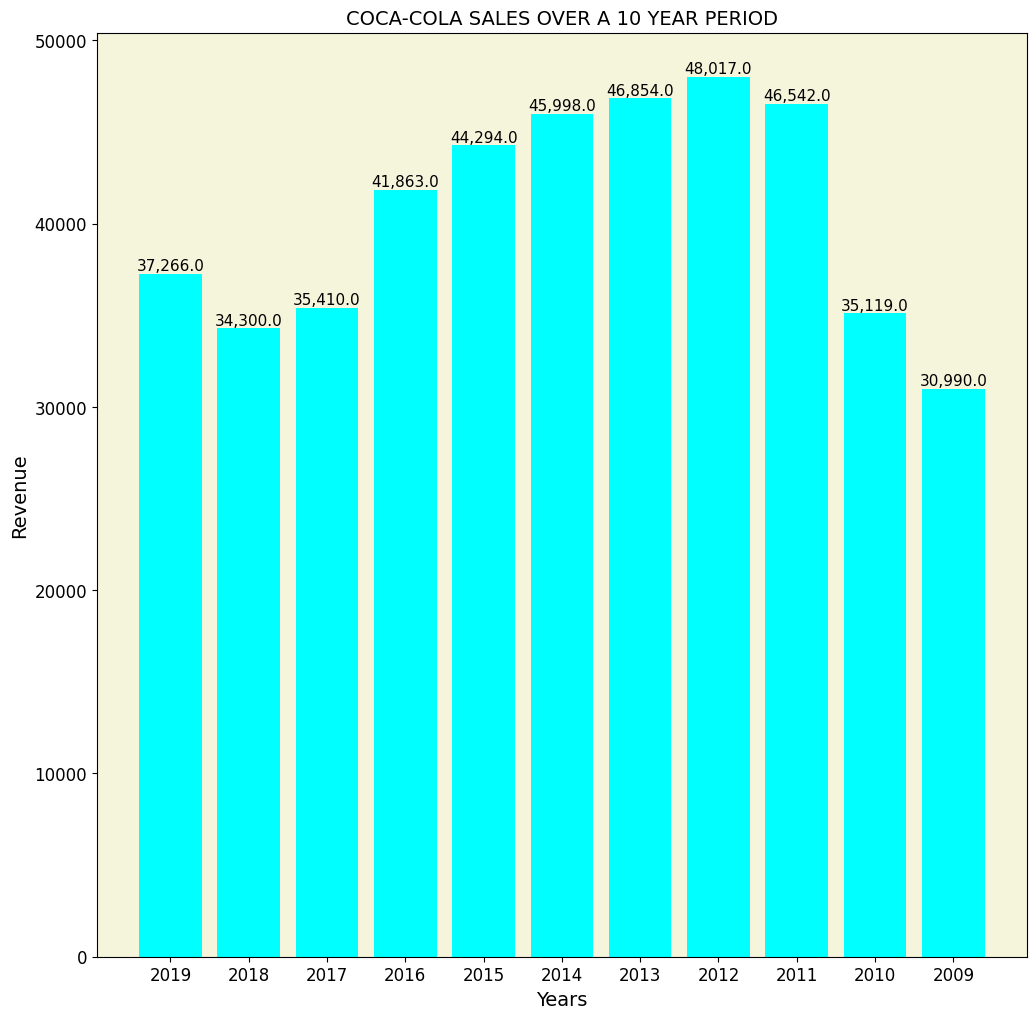

In [389]:
fig, ax = plt.subplots(figsize=(12, 12))  # Set the figure size to 12 x 12
ax.bar(graph_0['Year'], graph_0['Revenue'], color='cyan')  # Set the color to cyan
ax.set_xlabel('Years', fontsize=14)
ax.set_ylabel('Revenue', fontsize=14)
ax.set_title('COCA-COLA SALES OVER A 10 YEAR PERIOD', fontsize=14)

# Add revenue labels on top of each bar
for x, y in zip(graph_0['Year'], graph_0['Revenue']):
    ax.text(x, y, f"{y:,}", ha='center', va='bottom', fontsize=11)

ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)  # Set the font size of the x-axis tick labels
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)  # Set the font size of the y-axis tick labels

# Set the background color to a whitish cream
ax.set_facecolor('#F5F5DC')

plt.show()


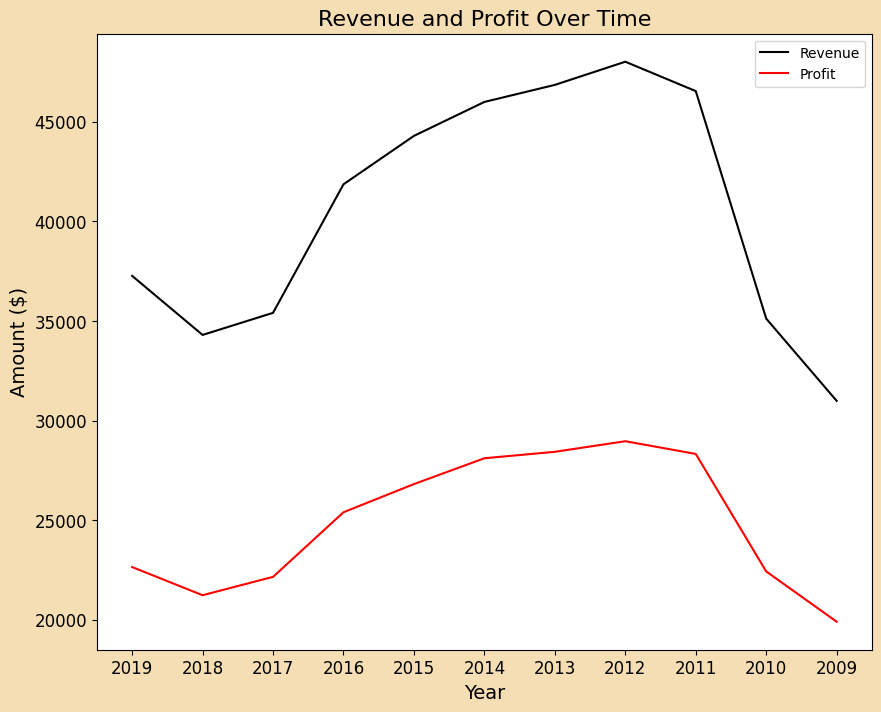

In [396]:
# Set the figure size and background color
fig = plt.figure(figsize=(10, 8))
fig.patch.set_facecolor('#F5DEB3')

# Plot the Revenue and Profit lines
plt.plot(graph_1['Year'], graph_1['Revenue'], color='black', label='Revenue')
plt.plot(graph_1['Year'], graph_1['Profit'], color='red', label='Profit')

# Set the x-axis and y-axis labels and tick label size
plt.xlabel('Year', fontsize=14)
plt.ylabel('Amount ($)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Set the plot title and legend
plt.title('Revenue and Profit Over Time', fontsize=16)
plt.legend(loc='best')

# Show the plot
plt.show()
